# Loading Dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub
import re
import numpy as np

plt.style.use('fivethirtyeight')
color_pallete = ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]

In [43]:
path = kagglehub.dataset_download("thedevastator/unlock-profits-with-e-commerce-sales-data")
path = os.path.join(path, r'Amazon Sale Report.csv')

Using Colab cache for faster access to the 'unlock-profits-with-e-commerce-sales-data' dataset.
Using Colab cache for faster access to the 'unlock-profits-with-e-commerce-sales-data' dataset.


In [44]:
df = pd.read_csv(path)
df = df[:50_000]
df.head()

/tmp/ipython-input-2593469420.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


/tmp/ipython-input-2593469420.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               50000 non-null  int64  
 1   Order ID            50000 non-null  object 
 2   Date                50000 non-null  object 
 3   Status              50000 non-null  object 
 4   Fulfilment          50000 non-null  object 
 5   Sales Channel       50000 non-null  object 
 6   ship-service-level  50000 non-null  object 
 7   Style               50000 non-null  object 
 8   SKU                 50000 non-null  object 
 9   Category            50000 non-null  object 
 10  Size                50000 non-null  object 
 11  ASIN                50000 non-null  object 
 12  Courier Status      47153 non-null  object 
 13  Qty                 50000 non-null  int64  
 14  currency            46960 non-null  object 
 15  Amount              46960 non-null  float64
 16  ship

# Cleaning Dataset

## 2.1 Dropping columns

In [46]:
unique_data_df = df.apply(pd.unique).to_frame(name='Unique Values')
unique_data_df.loc[:, 'Unique Count'] = df.apply(pd.Series.nunique).values
unique_data_df

,Unique Values,Unique Count
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",50000
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404...",46729
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...",32
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship...",10
Fulfilment,"[Merchant, Amazon]",2
Sales Channel,"[Amazon.in, Non-Amazon]",2
ship-service-level,"[Standard, Expedited]",2
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",1226
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",5757
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,...",8


,Unique Values,Unique Count
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",50000
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404...",46729
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...",32
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship...",10
Fulfilment,"[Merchant, Amazon]",2
Sales Channel,"[Amazon.in, Non-Amazon]",2
ship-service-level,"[Standard, Expedited]",2
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",1226
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",5757
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,...",8


In [47]:
# drop every column with 1 only unique value (where nan can be ignored and not replaced)
df_clean = df.drop(columns = ['currency', 'Unnamed: 22'], axis=1)
print(list(df_clean.columns))

['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by']
['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by']


## 2.2 Formatting Names

In [48]:
def clean_col_names(columns):
    new_columns = []
    for col in columns:
        col = col.lower()                           # lowercase every name
        col = col.replace(' ', '_')                 # replace spaces with underscores
        col = col.replace('-', '_')                 # replace hypens with underscores
        col = re.sub(r'[^a-zA-Z0-9_]', '', col)     # drop everything besides letters, digits or underscores
        col = col.strip('_')                        # strip trailing underscores
        new_columns.append(col)
    return new_columns

In [49]:
old_columns = df_clean.columns.tolist()
new_columns = clean_col_names(old_columns)

df_clean.columns = new_columns

print('Cleaned Columns:', new_columns)

Cleaned Columns: ['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']
Cleaned Columns: ['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']


In [50]:
# renaming ambiguous or poorly typed column names
new_columns = {'qty': 'quantity', 'amount': 'revenue'}
df_clean = df_clean.rename(columns=new_columns)
print('Cleaned Columns:', df_clean.columns.tolist())

Cleaned Columns: ['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'quantity', 'revenue', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']
Cleaned Columns: ['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'quantity', 'revenue', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids', 'b2b', 'fulfilled_by']


In [51]:
df_clean.head()

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [52]:
# cleaning indivual values within columns
df_clean.loc[:, 'ship_city'] = df_clean['ship_city'].str.title()
df_clean.loc[:, 'ship_state'] = df_clean['ship_state'].str.title()
df_clean.loc[:, 'category'] = df_clean['category'].str.title()
df_clean.loc[:, 'status'] = df_clean['status'].str.lower().replace(r'[\s-]+', '_', regex=True)
df_clean.head()

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,04-30-22,cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,Mumbai,Maharashtra,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,shipped_delivered_to_buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,...,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,...,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,Puducherry,Puducherry,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,IN,NaN,False,NaN


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,04-30-22,cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,Mumbai,Maharashtra,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,shipped_delivered_to_buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,...,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,...,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,Puducherry,Puducherry,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,IN,NaN,False,NaN


## 2.3 Datetime Formatting

In [53]:
print(df_clean['date'][0])

04-30-22
04-30-22


In [54]:
df_clean['date'] = pd.to_datetime(df_clean['date'], format = '%m-%d-%y')
df_clean.head()

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,Mumbai,Maharashtra,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,shipped_delivered_to_buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,...,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,...,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,2022-04-30,cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,Puducherry,Puducherry,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,IN,NaN,False,NaN


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,...,courier_status,quantity,revenue,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,0,405-8078784-5731545,2022-04-30,cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,647.62,Mumbai,Maharashtra,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,shipped_delivered_to_buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,...,Shipped,1,406.00,Bengaluru,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,Kurta,...,Shipped,1,329.00,Navi Mumbai,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,2022-04-30,cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,753.33,Puducherry,Puducherry,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,574.00,Chennai,Tamil Nadu,600073.0,IN,NaN,False,NaN


## 2.4 Fixing Blank Values

### 2.4.1 Courier status

In [55]:
print('Unique Courier Status Values: ', list(df_clean['courier_status'].unique()))

Unique Courier Status Values:  [nan, 'Shipped', 'Cancelled', 'Unshipped']
Unique Courier Status Values:  [nan, 'Shipped', 'Cancelled', 'Unshipped']


In [56]:
df_clean['courier_status'] = df_clean['courier_status'].fillna(value='Lost')
print('New unique courier status values: ', list(df_clean['courier_status'].unique()))

New unique courier status values:  ['Lost', 'Shipped', 'Cancelled', 'Unshipped']
New unique courier status values:  ['Lost', 'Shipped', 'Cancelled', 'Unshipped']


### 2.4.2 Promotion IDs

In [57]:
# finding unique and empty promotion-ids
print(
    f'Number of nan values: {df_clean['promotion_ids'].isna().sum()}'
    f'\nNumber of unique values: {df_clean["promotion_ids"].nunique()}'
    )

Number of nan values: 18626
Number of unique values: 1817
Number of nan values: 18626
Number of unique values: 1817


In [58]:
df_clean.loc[:, 'promotion_ids'] = df_clean['promotion_ids'].fillna(value='None')

print(f'Number of nan values: {df_clean['promotion_ids'].isna().sum()}')

Number of nan values: 0
Number of nan values: 0


### 2.4.3 Fullfilled By

In [59]:
# finding unique and empty rows for fulfillment method
print(
    f'Number of nan values: {df_clean['fulfilled_by'].isna().sum()}',
    f'\nNubmer of unique values: {df_clean["fulfilled_by"].unique()}'
)

Number of nan values: 33965 
Nubmer of unique values: ['Easy Ship' nan]
Number of nan values: 33965 
Nubmer of unique values: ['Easy Ship' nan]


In [60]:
df_clean.loc[:, 'fulfilled_by'] = df_clean["fulfilled_by"].fillna(value='Other Fulfillment')

print(f'Number of nan values: {df_clean["fulfilled_by"].isna().sum()}')

Number of nan values: 0
Number of nan values: 0


## 2.5 Dropping Rows

### 2.5.1 Revenue

In [61]:
print('Minimum revenue: ', df_clean['revenue'].min())
print('Maximum revenue: ', df_clean['revenue'].max())

Minimum revenue:  0.0
Maximum revenue:  5584.0
Minimum revenue:  0.0
Maximum revenue:  5584.0


In [62]:
# Lots of time revenue == 0 corrsponds to "cancelled" orders
# We will verify its true in our dataset
print(df_clean[df_clean['revenue'] == 0][['revenue', 'quantity', 'status']].head(10))

     revenue  quantity                      status
212      0.0         1  shipped_delivered_to_buyer
374      0.0         1  shipped_returned_to_seller
385      0.0         1                     shipped
388      0.0         1  shipped_delivered_to_buyer
392      0.0         1                     shipped
436      0.0         1                     shipped
441      0.0         1  shipped_delivered_to_buyer
446      0.0         1                     shipped
449      0.0         1                     shipped
729      0.0         1  shipped_delivered_to_buyer
     revenue  quantity                      status
212      0.0         1  shipped_delivered_to_buyer
374      0.0         1  shipped_returned_to_seller
385      0.0         1                     shipped
388      0.0         1  shipped_delivered_to_buyer
392      0.0         1                     shipped
436      0.0         1                     shipped
441      0.0         1  shipped_delivered_to_buyer
446      0.0         1         

**0.0** revenue **does not** correspond to returned or cancelled status of order. So we can either impute or drop the data. A safe assumption for dropping would be if the rows amount for less than 2% we can drop the rows.

In [63]:
print(f'Percentage of Blank revenue: {df_clean[df_clean['revenue'] == 0].shape[0] / df_clean.shape[0] * 100}% ')

Percentage of Blank revenue: 1.712% 
Percentage of Blank revenue: 1.712% 


In [64]:
df_clean = df_clean[df_clean['revenue'] > 0]
print(f'New lenght of dataframe: {df_clean.shape[0]}')

New lenght of dataframe: 46104
New lenght of dataframe: 46104


### 2.5.2 Quantity

In [65]:
print('Minimum quantity: ', df_clean['quantity'].min())
print('Maximum quantity: ', df_clean['quantity'].max())

Minimum quantity:  0
Maximum quantity:  8
Minimum quantity:  0
Maximum quantity:  8


In [66]:
# again, order quantity of 0 should correspond to not deleivered orders
# we will verify if its truly is the case
print(df_clean[df_clean['quantity'] == 0][['revenue', 'quantity', 'status']])

       revenue  quantity     status
0       647.62         0  cancelled
3       753.33         0  cancelled
23      570.48         0  cancelled
83     1105.36         0  cancelled
178     463.81         0  cancelled
...        ...       ...        ...
49888   380.00         0  cancelled
49908   551.43         0  cancelled
49924   734.29         0  cancelled
49951   734.29         0  cancelled
49990   686.67         0  cancelled

[2154 rows x 3 columns]
       revenue  quantity     status
0       647.62         0  cancelled
3       753.33         0  cancelled
23      570.48         0  cancelled
83     1105.36         0  cancelled
178     463.81         0  cancelled
...        ...       ...        ...
49888   380.00         0  cancelled
49908   551.43         0  cancelled
49924   734.29         0  cancelled
49951   734.29         0  cancelled
49990   686.67         0  cancelled

[2154 rows x 3 columns]


It seems 0 quanitity does correspond to cancelled orders and therefore need no dropping.

### 2.5.2 Locations

In [67]:
# checking number of empty cities/state/postal_code rows
print(df_clean['ship_city'].isna().sum(), df_clean['ship_state'].isna().sum(), df_clean['ship_postal_code'].isna().sum())

13 13 13
13 13 13


In [68]:
df_clean = df_clean.dropna(subset=['ship_city', 'ship_state', 'ship_postal_code'])
print(f'Length of dataframe: {df_clean.shape[0]}')

Length of dataframe: 46091
Length of dataframe: 46091


## 2.6 Verifying

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46091 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               46091 non-null  int64         
 1   order_id            46091 non-null  object        
 2   date                46091 non-null  datetime64[ns]
 3   status              46091 non-null  object        
 4   fulfilment          46091 non-null  object        
 5   sales_channel       46091 non-null  object        
 6   ship_service_level  46091 non-null  object        
 7   style               46091 non-null  object        
 8   sku                 46091 non-null  object        
 9   category            46091 non-null  object        
 10  size                46091 non-null  object        
 11  asin                46091 non-null  object        
 12  courier_status      46091 non-null  object        
 13  quantity            46091 non-null  int64         


In [70]:
unique_data_df = df_clean.apply(pd.unique).to_frame(name='Unique Values')
unique_data_df.loc[:, 'Unique Count'] = df_clean.apply(pd.Series.nunique).values
unique_data_df

,Unique Values,Unique Count
index,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...",46091
order_id,"[405-8078784-5731545, 171-9198151-1101146, 404...",42995
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:...",32
status,"[cancelled, shipped_delivered_to_buyer, shippe...",9
fulfilment,"[Merchant, Amazon]",2
sales_channel,[Amazon.in],1
ship_service_level,"[Standard, Expedited]",2
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",1220
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",5683
category,"[Set, Kurta, Western Dress, Top, Ethnic Dress,...",8


,Unique Values,Unique Count
index,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...",46091
order_id,"[405-8078784-5731545, 171-9198151-1101146, 404...",42995
date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:...",32
status,"[cancelled, shipped_delivered_to_buyer, shippe...",9
fulfilment,"[Merchant, Amazon]",2
sales_channel,[Amazon.in],1
ship_service_level,"[Standard, Expedited]",2
style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET...",1220
sku,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...",5683
category,"[Set, Kurta, Western Dress, Top, Ethnic Dress,...",8


In [71]:
# drop remaining column with 1 only unique value
df_clean = df_clean.drop(columns = ['sales_channel', 'ship_country'], axis=1)
print(list(df_clean.columns))

['index', 'order_id', 'date', 'status', 'fulfilment', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'quantity', 'revenue', 'ship_city', 'ship_state', 'ship_postal_code', 'promotion_ids', 'b2b', 'fulfilled_by']
['index', 'order_id', 'date', 'status', 'fulfilment', 'ship_service_level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'quantity', 'revenue', 'ship_city', 'ship_state', 'ship_postal_code', 'promotion_ids', 'b2b', 'fulfilled_by']


In [72]:
#df_clean.to_csv('amazon_retail_50000_clean.csv')

# EDA

## Indian Currency Converter

In [73]:
def format_indian_currency(amount):
    """
    Formats a number into an Indian Rupees style string with correct
    lakh/crore grouping (3 digits, then 2 digits, then 2, etc.).
    e.g., 1234567.89 -> '₹ 12,34,567.89'
    """
    # 1. Handle sign and ensure positive number for formatting
    sign = '-' if amount < 0 else ''
    amount = abs(amount)

    # 2. Convert to string, ensuring 2 decimal places
    amount_str = f"{amount:.2f}"

    # 3. Split into integer and decimal parts
    parts = amount_str.split('.')
    integer_part = parts[0]
    decimal_part = parts[1]

    # 4. Apply the Indian grouping logic (3 digits, then 2 digits)

    # Get the last three digits (thousands group)
    last_three = integer_part[-3:]
    # Get the rest of the digits
    rest = integer_part[:-3]

    # Use a list to build the formatted integer string in reverse order
    formatted_groups = [last_three]

    # Group the 'rest' part in sets of two, working backwards
    i = len(rest)
    while i > 0:
        # Get the next group of 2
        next_group_start = max(0, i - 2)
        group = rest[next_group_start:i]

        formatted_groups.append(group)
        i -= 2

    # Reverse the order of the groups and join them with a comma
    # Example: ['567', '34', '12'] -> ['12', '34', '567'] -> "12,34,567"
    formatted_integer_part = ','.join(reversed(formatted_groups))

    # 5. Combine and return
    return f"{sign}₹ {formatted_integer_part}.{decimal_part}"

## Global KPIs

In [74]:
print(df_clean['status'].unique())

['cancelled' 'shipped_delivered_to_buyer' 'shipped'
 'shipped_returned_to_seller' 'shipped_rejected_by_buyer'
 'shipped_out_for_delivery' 'shipped_returning_to_seller'
 'shipped_picked_up' 'pending']
['cancelled' 'shipped_delivered_to_buyer' 'shipped'
 'shipped_returned_to_seller' 'shipped_rejected_by_buyer'
 'shipped_out_for_delivery' 'shipped_returning_to_seller'
 'shipped_picked_up' 'pending']


In [75]:
strictly_lost_statuses = [
    'cancelled',
    'shipped_returned_to_seller',
    'shipped_rejected_by_buyer',
    'shipped_returning_to_seller'
]

In [76]:
global_kpis = {
    # Fundamental Counts
    'Total Revenue': format_indian_currency(df_clean['revenue'].sum()),
    'Total Units Sold': df_clean['quantity'].sum(),
    'Total Unique Orders': df_clean['order_id'].nunique(),
    'Total Line Items (Rows)': len(df_clean),

    # Order Value & Size
    'Average Order Value (AOV)': format_indian_currency(df_clean['revenue'].sum() / df_clean['order_id'].nunique()),
    'Average Units per Order (Basket Size)': df_clean['quantity'].sum() / df_clean['order_id'].nunique(),
    'Average Line Items per Order': len(df_clean) / df_clean['order_id'].nunique(),

    # Pricing
    'Average Selling Price (ASP)': format_indian_currency(df_clean['revenue'].sum() / df_clean['quantity'].sum()),

    # B2B Mix (Calculated at Item/Row Level)
    '% B2B Items': len(df_clean.loc[df_clean['b2b'] == True]) / len(df_clean) * 100,

    # Fulfillment
    'Successful Delivery Rate (%)': len(df_clean.loc[df_clean['status'] == 'shipped_delivered_to_buyer']) / len(df_clean) * 100,

    # Status/Loss
    'Order Cancellation Rate (%)': len(df_clean.loc[df_clean['status'] == 'cancelled']) / len(df_clean) * 100,
    'Total Undelivered Revenue': format_indian_currency(df_clean.loc[df_clean['status'] != 'shipped_delivered_to_buyer']['revenue'].sum()),
    'Strictly Lost Revenue': format_indian_currency(df_clean.loc[df_clean['status'].isin(strictly_lost_statuses)]['revenue'].sum()),

    # Promotions
    'Promoted Revenue': format_indian_currency(df_clean.loc[df_clean['promotion_ids'] != 'None']['revenue'].sum()),

    # Geographic
    'Revenue Concentration': format_indian_currency(df_clean['revenue'].sum() / df_clean['ship_postal_code'].nunique()),
}

print(f'{'':<30}GLOBAL KPIS')
print('-'*75)
print(f'{'KPI':<50}{'Value'}')
print('-'*75)
for k, v in global_kpis.items():
    if isinstance(v, str):
        print(f'{k:<50} {v}')
    else:
        print(f'{k:<50} {v:.2f}')

                              GLOBAL KPIS
---------------------------------------------------------------------------
KPI                                               Value
---------------------------------------------------------------------------
Total Revenue                                      ₹ 2,94,33,964.86
Total Units Sold                                   44116.00
Total Unique Orders                                42995.00
Total Line Items (Rows)                            46091.00
Average Order Value (AOV)                          ₹ 684.59
Average Units per Order (Basket Size)              1.03
Average Line Items per Order                       1.07
Average Selling Price (ASP)                        ₹ 667.19
% B2B Items                                        0.75
Successful Delivery Rate (%)                       25.93
Order Cancellation Rate (%)                        9.31
Total Undelivered Revenue                          ₹ 2,18,44,515.86
Strictly Lost Revenue            

## Successful Orders

In [77]:
df_main = df_clean[df_clean['status'] == 'shipped_delivered_to_buyer']
print(
    f'Number of sales with successful delieveries {len(df_main)}',
    f'\n% Retained: {len(df_main) / len(df_clean)*100:.2f}%',
    f'\n% Dropped: {(len(df_clean) - len(df_main)) / len(df_clean)*100:.2f}%'
    )

Number of sales with successful delieveries 11951 
% Retained: 25.93% 
% Dropped: 74.07%
Number of sales with successful delieveries 11951 
% Retained: 25.93% 
% Dropped: 74.07%


In [78]:
global_success_kpis = {
    # Fundamental Counts
    'Total Revenue': format_indian_currency(df_main['revenue'].sum()),
    'Total Units Sold': df_main['quantity'].sum(),
    'Total Unique Orders': df_main['order_id'].nunique(),
    'Total Line Items (Rows)': len(df_main),

    # Order Value & Size
    'Average Order Value (AOV)':format_indian_currency(df_main['revenue'].sum() / df_main['order_id'].nunique()),
    'Average Units per Order (Basket Size)': df_main['quantity'].sum() / df_main['order_id'].nunique(),
    'Average Line Items per Order': len(df_main) / df_main['order_id'].nunique(),

    # Pricing
    'Average Selling Price (ASP)': format_indian_currency(df_main['revenue'].sum() / df_main['quantity'].sum()),

    # B2B Mix (Calculated at Item/Row Level)
    '% B2B Items': len(df_main.loc[df_main['b2b'] == True]) / len(df_main) * 100,
}

print(f'{'':<30}KPIs for successful deliveries')
print('-'*75)
print(f'{'KPI':<50}{'Value'}')
print('-'*75)
for k, v in global_success_kpis.items():
    if isinstance(v, str):
        print(f'{k:<50} {v}')
    else:
        print(f'{k:<50} {v:.2f}')

                              KPIs for successful deliveries
---------------------------------------------------------------------------
KPI                                               Value
---------------------------------------------------------------------------
Total Revenue                                      ₹ 75,89,449.00
Total Units Sold                                   12011.00
Total Unique Orders                                10960.00
Total Line Items (Rows)                            11951.00
Average Order Value (AOV)                          ₹ 692.47
Average Units per Order (Basket Size)              1.10
Average Line Items per Order                       1.09
Average Selling Price (ASP)                        ₹ 631.87
% B2B Items                                        1.05
                              KPIs for successful deliveries
---------------------------------------------------------------------------
KPI                                               Value
----

## Product and Inventory KPIs

### Bar Chart Formatter

In [79]:
def add_data_labels(ax, bars, data_type):
    #Attach a text label above each bar in *bars*, displaying its height
    for bar in bars:
            # Get the height (value) of the bar
            height = bar.get_height()
            # Use ax.text() to place the label
            if data_type == 'currency':
                if height / 10e7 > 1:
                    num_text = f'Rs. {height / 10e7:.0f} Cr'
                elif height / 10e5 > 1 and height / 10e7 < 1:
                    num_text = f'Rs. {height / 10e5:.0f} L'
                elif height / 10e3 > 1 and height / 10e5 < 1:
                    num_text = f'{height / 10e3:.0f} K'
                else:
                    num_text = f'Rs. {height:.2f}'

            elif data_type == 'percentage':
                num_text = f'{height:.2f}%'
            else:
                num_text = f'{height}'
            ax.text(
                # Horizontal position: Center of the bar (x-coordinate + half of the bar width)
                bar.get_x() + bar.get_width() / 2.,
                # Vertical position: Slightly above the bar
                height + (height * 0.02), # Adds a small 2% offset from the bar height
                # The text label itself (formatted with a comma separator for large numbers)
                s=num_text,
                ha='center', # Horizontal alignment: Center
                va='bottom', # Vertical alignment: Bottom
                fontsize=12,
                #fontweight='bold'
            )
    return ax

### Categories

In [80]:
best_selling_categories = {
    'by_revenue': df_clean.groupby('category')['revenue'].sum().sort_values(ascending=False),
    'by_units': df_clean.groupby('category')['quantity'].sum().sort_values(ascending=False),
    'by_orders': df_clean.groupby('category')['order_id'].nunique().sort_values(ascending=False),
}

best_selling_categories = pd.DataFrame(best_selling_categories)
best_selling_categories

,by_revenue,by_units,by_orders
category,,,
Blouse,198381.21,378,382
Bottom,63308.45,163,161
Ethnic Dress,262956.65,322,339
Kurta,8154385.72,17571,17235
Saree,55655.24,68,58
Set,15770971.17,18032,17864
Top,1869544.55,3698,3654
Western Dress,3058761.87,3884,3910


,by_revenue,by_units,by_orders
category,,,
Blouse,198381.21,378,382
Bottom,63308.45,163,161
Ethnic Dress,262956.65,322,339
Kurta,8154385.72,17571,17235
Saree,55655.24,68,58
Set,15770971.17,18032,17864
Top,1869544.55,3698,3654
Western Dress,3058761.87,3884,3910


Text(0.5, 0.01, 'Categories')

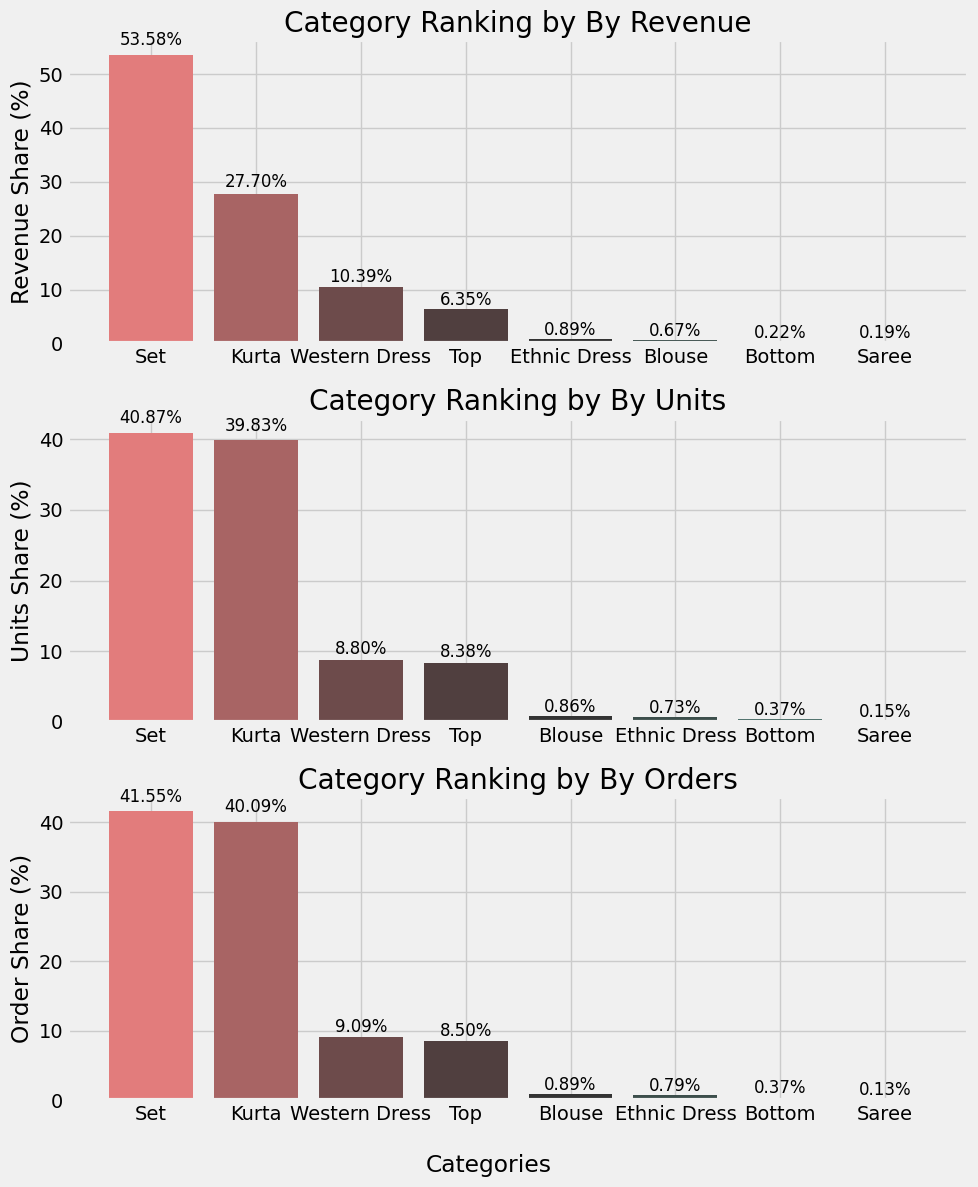

Text(0.5, 0.01, 'Categories')

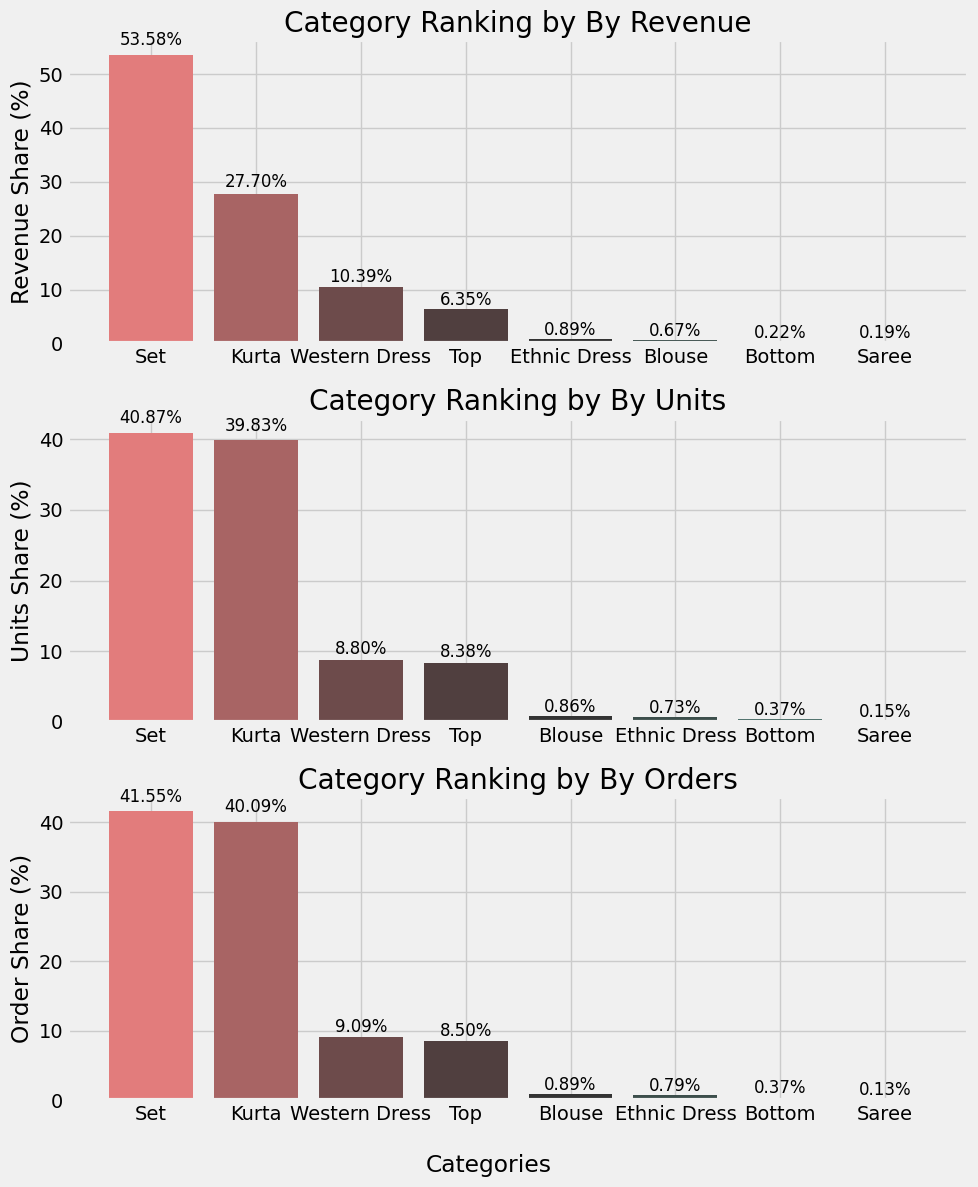

In [81]:
fig = plt.figure(figsize=(10, 12), tight_layout=True)
for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)

    if i == 0:
        # Sort by 'by_revenue' for this plot
        sorted_data = best_selling_categories.sort_values(by='by_revenue', ascending=False)
        plot_values = sorted_data.loc[:, 'by_revenue'] / df_clean['revenue'].sum() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_revenue'
            plot_values,
            color=color_pallete
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Revenue Share (%)')

    elif i == 1:
        # Sort by 'by_units' for this plot
        sorted_data = best_selling_categories.sort_values(by='by_units', ascending=False)
        plot_values = sorted_data.loc[:, 'by_units'] / df_clean['quantity'].sum() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_units'
            plot_values,
            color=color_pallete
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Units Share (%)')

    elif i == 2:
        # Sort by 'by_orders' for this plot
        sorted_data = best_selling_categories.sort_values(by='by_orders', ascending=False)
        plot_values = sorted_data.loc[:, 'by_orders']/ df_clean['order_id'].nunique() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_orders'
            plot_values,
            color=color_pallete
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Order Share (%)')

    # Set the title for clarity
    ax.set_title(f'Category Ranking by {sorted_data.columns[i].replace("_", " ").title()}')

fig.supxlabel('Categories')

### SKUs

In [82]:
best_selling_sku = {
    'by_revenue': df_clean.groupby('sku')['revenue'].sum().sort_values(ascending=False),
    'by_units': df_clean.groupby('sku')['quantity'].sum().sort_values(ascending=False),
    'by_orders': df_clean.groupby('sku')['order_id'].nunique().sort_values(ascending=False),
}

best_selling_sku = pd.DataFrame(best_selling_sku)
best_selling_sku

,by_revenue,by_units,by_orders
sku,,,
AN201-RED-M,229.0,1,1
AN202-ORANGE-M,229.0,1,1
AN202-ORANGE-S,229.0,1,1
AN202-ORANGE-XXL,229.0,1,1
AN205-YELLOW-S,723.0,3,3
...,...,...,...
SET433-KR-NP-XXXL,666.0,1,1
SET435-KR-NP-M,3998.0,2,2
SET435-KR-NP-XS,1399.0,1,1


,by_revenue,by_units,by_orders
sku,,,
AN201-RED-M,229.0,1,1
AN202-ORANGE-M,229.0,1,1
AN202-ORANGE-S,229.0,1,1
AN202-ORANGE-XXL,229.0,1,1
AN205-YELLOW-S,723.0,3,3
...,...,...,...
SET433-KR-NP-XXXL,666.0,1,1
SET435-KR-NP-M,3998.0,2,2
SET435-KR-NP-XS,1399.0,1,1


Text(0.5, 0.01, 'Categories')

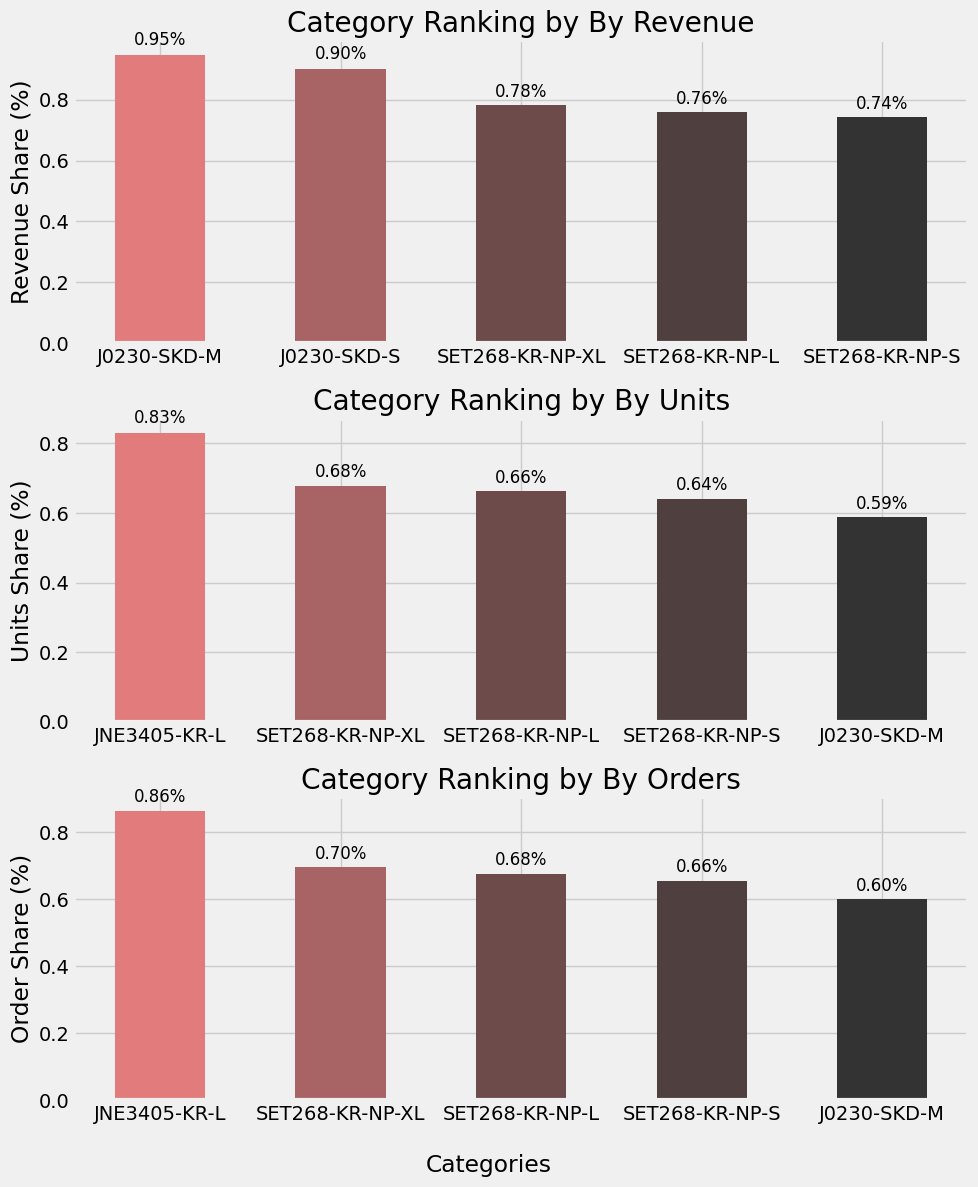

In [84]:
fig = plt.figure(figsize=(10, 12), tight_layout=True)
for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)

    if i == 0:
        # Sort by 'by_revenue' for this plot
        sorted_data = best_selling_sku.sort_values(by='by_revenue', ascending=False)[:5]
        plot_values = sorted_data.loc[:, 'by_revenue'] / df_clean['revenue'].sum() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_revenue'
            plot_values,
            color=color_pallete,
            width=0.5
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Revenue Share (%)')

    elif i == 1:
        # Sort by 'by_units' for this plot
        sorted_data = best_selling_sku.sort_values(by='by_units', ascending=False)[:5]
        plot_values = sorted_data.loc[:, 'by_units'] / df_clean['quantity'].sum() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_units'
            plot_values,
            color=color_pallete,
            width=0.5
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Units Share (%)')

    elif i == 2:
        # Sort by 'by_orders' for this plot
        sorted_data = best_selling_sku.sort_values(by='by_orders', ascending=False)[:5]
        plot_values = sorted_data.loc[:, 'by_orders']/ df_clean['order_id'].nunique() * 100
        bars = ax.bar(
            sorted_data.index, # Use the index sorted by 'by_orders'
            plot_values,
            color=color_pallete,
            width=0.5
        )
        ax = add_data_labels(ax, bars, 'percentage')
        ax.set_ylabel('Order Share (%)')

    # Set the title for clarity
    ax.set_title(f'Category Ranking by {sorted_data.columns[i].replace("_", " ").title()}')

fig.supxlabel('Categories')

## 3.3 Customer Segmentation

In [206]:
print('Total days of data:', df_clean['date'].max() - df_clean['date'].min())

Total days of data: 61 days 00:00:00


`WARNING`: Data only spans 2 months (for a large buisness like Amazon) and the rfm analysis is a **relative** one and does not really give good insights.

`Assumption`: Since we **lack customer_id** column, we use **ship_postal_code** as proxy for unique customers.

In [189]:
rfm_df = df_clean[['ship_postal_code', 'date', 'revenue', 'quantity', 'order_id']].copy()
rfm_df.head()

,ship_postal_code,date,revenue,quantity,order_id
0,400081.0,2022-04-30,647.62,0,405-8078784-5731545
1,560085.0,2022-04-30,406.00,1,171-9198151-1101146
2,410210.0,2022-04-30,329.00,1,404-0687676-7273146
3,605008.0,2022-04-30,753.33,0,403-9615377-8133951
4,600073.0,2022-04-30,574.00,1,407-1069790-7240320


In [190]:
# latest transcation date in dataset
last_transaction_date = rfm_df['date'].max()
# adding 1 to prevent 0 recency scores
snapshot_date = last_transaction_date + pd.Timedelta(days=1)
print(f"Snapshot Date (Universal 'Today'): {snapshot_date.date()}")

Snapshot Date (Universal 'Today'): 2022-06-01


In [191]:
# Group and Aggregate (R, F, M)
rfm_grouped_df = rfm_df.groupby('ship_postal_code').agg(
    # Recency (R): Days since the last order FOR THAT POSTAL CODE
    recency=('date', lambda x: (snapshot_date - x.max()).days),

    # Frequency (F): Total number of unique orders FOR THAT POSTAL CODE
    frequency=('order_id', 'nunique'),

    # Monetary (M): Total revenue FOR THAT POSTAL CODE
    monetary=('revenue', 'sum')
).reset_index()

rfm_grouped_df.head()

,ship_postal_code,recency,frequency,monetary
0,110001.0,33,17,12752.57
1,110002.0,1,16,12157.14
2,110003.0,32,24,15258.00
3,110005.0,33,21,13604.86
4,110006.0,37,11,5329.00


In [192]:
# check for distribution skewness
print(f'{'Qunatity':<30}{'Unique Values'}')
for col in rfm_grouped_df.columns:
    print(f'{col:<30}{rfm_grouped_df[col].nunique()}')

Qunatity                      Unique Values
ship_postal_code              6653
recency                       32
frequency                     112
monetary                      3680


`Issues`: Since recency and frequency have very few unique values compared to postal codes, we need to further look into distribution to prevent errors.

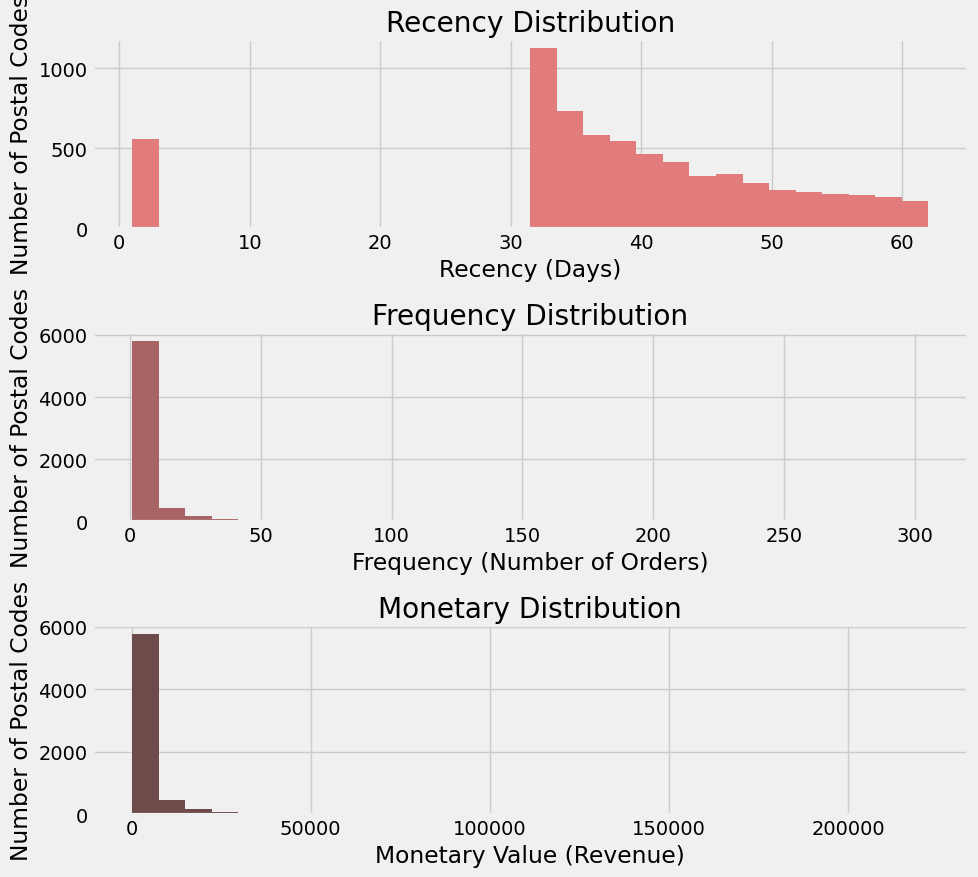

In [193]:
fig = plt.figure(figsize=(10, 9), tight_layout=True)
for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)
    if i == 0:
        ax.hist(rfm_grouped_df['recency'], bins=30, color = color_pallete[0])
        ax.set_title('Recency Distribution')
        ax.set_xlabel('Recency (Days)')
    elif i == 1:
        ax.hist(rfm_grouped_df['frequency'], bins=30, color = color_pallete[1])
        ax.set_title('Frequency Distribution')
        ax.set_xlabel('Frequency (Number of Orders)')
    elif i == 2:
        ax.hist(rfm_grouped_df['monetary'], bins=30, color = color_pallete[2])
        ax.set_title('Monetary Distribution')
        ax.set_xlabel('Monetary Value (Revenue)')
    ax.set_ylabel('Number of Postal Codes')

- We can see that both frequency and monetary values are highly skewed to lower values.
- If we use predefined **labels** in `pd.qcut` method, pandas might not be able to cut into predefined **labels**
- So we use a work-around with `.cat.codes` which return **(0, num_bin)** values and add then add to get our usual **(1,5)** scores.

In [194]:
# calculating rfm_scores

# f-score
rfm_grouped_df['f_score'] = pd.qcut(
    rfm_grouped_df['frequency'],
    q=5, # Divide into 5 bins
    duplicates="drop",
).cat.codes + 1

# m-score
rfm_grouped_df['m_score'] = pd.qcut(
    rfm_grouped_df['monetary'],
    q=5,
    duplicates="drop",
).cat.codes + 1

# r-score (lower is better, so inversion needs to be performed)
rfm_grouped_df['r_score'] = 6 - (pd.qcut(
    rfm_grouped_df['recency'],
    q=5,
    duplicates="drop",
).cat.codes + 1)

rfm_grouped_df.head()

,ship_postal_code,recency,frequency,monetary,f_score,m_score,r_score
0,110001.0,33,17,12752.57,4,5,5
1,110002.0,1,16,12157.14,4,5,5
2,110003.0,32,24,15258.00,4,5,5
3,110005.0,33,21,13604.86,4,5,5
4,110006.0,37,11,5329.00,4,5,3


In [195]:
# Create the combined RFM score (e.g., '555', '321')
# usually recency is given highest weight (priority) when computing rfm_score
rfm_grouped_df['rfm_score'] = (
    rfm_grouped_df['r_score'].astype(int) * 100 +
    rfm_grouped_df['f_score'].astype(int) * 10 +
    rfm_grouped_df['m_score'].astype(int)
)
rfm_grouped_df.head()

,ship_postal_code,recency,frequency,monetary,f_score,m_score,r_score,rfm_score
0,110001.0,33,17,12752.57,4,5,5,545
1,110002.0,1,16,12157.14,4,5,5,545
2,110003.0,32,24,15258.00,4,5,5,545
3,110005.0,33,21,13604.86,4,5,5,545
4,110006.0,37,11,5329.00,4,5,3,345


In [202]:
def rfm_segment(row):
    # Champions/Best Customers (R=5, F=5, M=5)
    if row['r_score'] >= 4 and row['f_score'] >= 4 and row['m_score'] > 4:
        return 'Champions'
    # Loyal Customers (High F, reasonable R, reasonable M)
    elif row['f_score'] >= 4 and row['r_score'] >= 2 and row['m_score'] >=2:
        return 'Loyal Customers'
    # At Risk (Low R, High F - They used to buy, but stopped)
    elif row['r_score'] <= 2 and row['f_score'] >= 3:
        return 'At Risk'
    # Lost (Low R, Low F)
    elif row['r_score'] <= 2 and row['f_score'] <= 2:
        return 'Lost'
    # New Customers (High R, Low F, Low M)
    elif row['r_score'] >= 4 and row['f_score'] == 1:
        return 'New Customers'
    # Other/Need Attention
    else:
        return 'Potential/Other'

In [203]:
rfm_grouped_df['RFM_Segment'] = rfm_grouped_df.apply(rfm_segment, axis=1)

print("\nFinal RFM Segment Counts:")
print(rfm_grouped_df['RFM_Segment'].value_counts())


Final RFM Segment Counts:
RFM_Segment
Lost               2426
Potential/Other    2011
Champions          1111
New Customers       720
At Risk             196
Loyal Customers     189
Name: count, dtype: int64


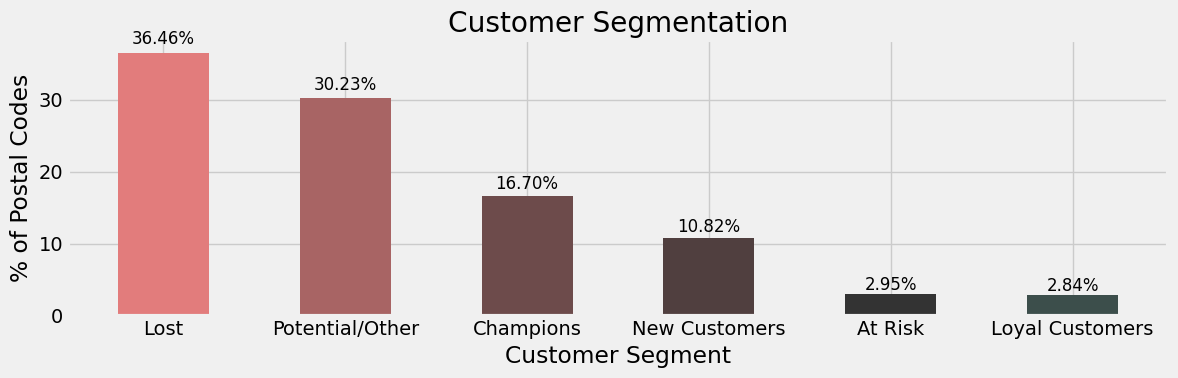

In [204]:
customer_segs_counts = rfm_grouped_df['RFM_Segment'].value_counts().values
customer_segs_per = customer_segs_counts / customer_segs_counts.sum() * 100

fig = plt.figure(figsize=(12,4), tight_layout=True)
ax = fig.add_subplot(1,1,1)
bars = ax.bar(
    rfm_grouped_df['RFM_Segment'].value_counts().index,
    customer_segs_per,
    width=0.5,
    color=color_pallete
    )
bars = add_data_labels(ax, bars, data_type='percentage')
ax.set_ylabel('% of Postal Codes')
ax.set_xlabel('Customer Segment')
ax.set_title('Customer Segmentation');